In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def compute_heat_index(T_C, RH):
    """
    Compute Heat Index from temperature (°C) and relative humidity (%).
    Returns HI in °F (same shape as T_C and RH).
    """
    # Convert temp from °C to °F
    T = T_C * 9/5 + 32

    # Step 1: Simple HI estimate
    simple_HI = 0.5 * (T + 61.0 + ((T - 68.0) * 1.2) + (RH * 0.094))
    avg_HI = (simple_HI + T) / 2

    # Initialize HI with simple formula
    HI = np.where(avg_HI < 80, simple_HI, 0.0)

    # Rothfusz regression
    HI_reg = (-42.379 + 2.04901523 * T + 10.14333127 * RH - 0.22475541 * T * RH
              - 0.00683783 * T**2 - 0.05481717 * RH**2 + 0.00122874 * T**2 * RH
              + 0.00085282 * T * RH**2 - 0.00000199 * T**2 * RH**2)

    # Adjustment: Low RH
    adj_low_RH = ((13 - RH)/4) * np.sqrt((17 - np.abs(T - 95))/17)
    condition_low_RH = (RH < 13) & (T >= 80) & (T <= 112)

    # Adjustment: High RH
    adj_high_RH = ((RH - 85)/10) * ((87 - T)/5)
    condition_high_RH = (RH > 85) & (T >= 80) & (T <= 87)

    # Apply adjustments
    HI_reg_adj = HI_reg.copy()
    HI_reg_adj = np.where(condition_low_RH, HI_reg_adj - adj_low_RH, HI_reg_adj)
    HI_reg_adj = np.where(condition_high_RH, HI_reg_adj + adj_high_RH, HI_reg_adj)

    # Use Rothfusz if avg_HI >= 80
    HI = np.where(avg_HI >= 80, HI_reg_adj, HI)

    return HI  # in °F


In [ ]:
# Load dataset
ds = xr.open_dataset("")

# Replace with actual variable names
temp = ds["temperature"]  # in °C
rh = ds["relative_humidity"]  # in %

# Compute HI
HI_values = xr.apply_ufunc(
    compute_heat_index,
    temp,
    rh,
    input_core_dims=[[], []],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float]
)

# Add HI to dataset
ds["heat_index"] = HI_values
ds["heat_index"].attrs["units"] = "°F"
ds["heat_index"].attrs["long_name"] = "Heat Index (Apparent Temperature)"


In [8]:
rh =  xr.open_mfdataset('C:/Users/WINFRED VORDOAGU/Desktop/PYTHON/CORDEX/CORDEX_RH/*.nc')
rh                        

<xarray.Dataset>
Dimensions:                     (time: 20089, bnds: 2, rlat: 37, rlon: 23,
                                 vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 2006-01-01T12:00:00 ......
    lon                         (rlat, rlon) float32 dask.array<chunksize=(37, 23), meta=np.ndarray>
    lat                         (rlat, rlon) float32 dask.array<chunksize=(37, 23), meta=np.ndarray>
  * rlon                        (rlon) float64 -3.41 -3.19 -2.97 ... 1.21 1.43
  * rlat                        (rlat) float64 4.51 4.73 4.95 ... 12.21 12.43
    height                      float64 2.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] dask.array<chunksize=(1826, 2), meta=np.ndarray>
    lon_bnds                    (time, rlat, rlon, vertices) float32 dask.array<chunksize=(1826, 37, 23, 4), meta=np.ndarray>
    lat_bnds                    (time, rlat, rlon, vertices) float32 dask.array<chunksize=(1826, 37, 23, 4), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    hurs                        (time, rlat, rlon) float32 dask.array<chunksize=(1826, 37, 23), meta=np.ndarray>
Attributes: (12/37)
    CDI:                            Climate Data Interface version 1.9.9rc1 (...
    Conventions:                    CF-1.4
    history:                        Mon May 12 17:01:06 2025: cdo sellonlatbo...
    source:                         GERICS-REMO2015
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    ...                             ...
    realization:                    1
    cmor_version:                   2.9.1
    creation_date:                  2019-07-19-T15:12:00Z
    tracking_id:                    hdl:21.14103/72fc6d31-bce6-474c-9db6-4f2b...
    c3s_disclaimer:                 This data has been curated and prepared i...
    CDO:                            Climate Data Operators version 1.9.9rc1 (...

In [9]:
temp =  xr.open_mfdataset('C:/Users/WINFRED VORDOAGU/Desktop/PYTHON/CORDEX/CORDEX_TEMP/*.nc')
temp

<xarray.Dataset>
Dimensions:                     (time: 20089, bnds: 2, rlat: 37, rlon: 23,
                                 vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 2006-01-01T12:00:00 ......
    lon                         (rlat, rlon) float32 dask.array<chunksize=(37, 23), meta=np.ndarray>
    lat                         (rlat, rlon) float32 dask.array<chunksize=(37, 23), meta=np.ndarray>
  * rlon                        (rlon) float64 -3.41 -3.19 -2.97 ... 1.21 1.43
  * rlat                        (rlat) float64 4.51 4.73 4.95 ... 12.21 12.43
    height                      float64 2.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] dask.array<chunksize=(1826, 2), meta=np.ndarray>
    lon_bnds                    (time, rlat, rlon, vertices) float32 dask.array<chunksize=(1826, 37, 23, 4), meta=np.ndarray>
    lat_bnds                    (time, rlat, rlon, vertices) float32 dask.array<chunksize=(1826, 37, 23, 4), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    tasmax                      (time, rlat, rlon) float32 dask.array<chunksize=(1826, 37, 23), meta=np.ndarray>
Attributes: (12/37)
    CDI:                            Climate Data Interface version 1.9.9rc1 (...
    Conventions:                    CF-1.4
    history:                        Mon May 12 16:58:19 2025: cdo sellonlatbo...
    source:                         GERICS-REMO2015
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    ...                             ...
    realization:                    1
    cmor_version:                   2.9.1
    creation_date:                  2019-07-19-T11:18:37Z
    tracking_id:                    hdl:21.14103/8a5730b9-9258-42d5-8ecb-6cb2...
    c3s_disclaimer:                 This data has been curated and prepared i...
    CDO:                            Climate Data Operators version 1.9.9rc1 (...

In [14]:
tas_celsius = temp['tasmax'] - 273.15
rh = rh['hurs']


In [15]:

def calculate_wbt(t, rh):
    return (t * np.arctan(0.151977 * np.sqrt(rh + 8.313659)) +
            np.arctan(t + rh) -
            np.arctan(rh - 1.676331) +
            0.00391838 * rh**1.5 * np.arctan(0.023101 * rh) -
            4.686035)

# Apply the function
wbt = calculate_wbt(tas_celsius, rh)
wbt.name = "wet_bulb_temperature"
wbt.attrs["units"] = "degC"
wbt.attrs["description"] = "Wet Bulb Temperature calculated using Roland Stull's empirical formula"


In [16]:
wbt.to_netcdf("wbt_cordex_daily.nc")


In [18]:
wet_bulb_temp = xr.open_dataset('wbt_cordex_daily.nc')
wet_bulb_temp

<xarray.Dataset>
Dimensions:               (time: 20089, rlat: 37, rlon: 23)
Coordinates:
  * time                  (time) datetime64[ns] 2006-01-01T12:00:00 ... 2060-...
    lon                   (rlat, rlon) float32 ...
    lat                   (rlat, rlon) float32 ...
  * rlon                  (rlon) float64 -3.41 -3.19 -2.97 ... 0.99 1.21 1.43
  * rlat                  (rlat) float64 4.51 4.73 4.95 ... 11.99 12.21 12.43
    height                float64 ...
Data variables:
    wet_bulb_temperature  (time, rlat, rlon) float32 ...

In [62]:
# Group WBT by month and compute mean for each month
monthly_wbt_climatology = tas_celsius.sel(time=slice( '2030','2060')).groupby("time.month").mean(dim="time")
lons = temp['rlon']  # or rh['lon']
lats = temp['rlat']
monthly_wbt_climatology

<xarray.DataArray 'tasmax' (month: 12, rlat: 37, rlon: 23)>
dask.array<stack, shape=(12, 37, 23), dtype=float32, chunksize=(1, 37, 23), chunktype=numpy.ndarray>
Coordinates:
    lon      (rlat, rlon) float32 dask.array<chunksize=(37, 23), meta=np.ndarray>
    lat      (rlat, rlon) float32 dask.array<chunksize=(37, 23), meta=np.ndarray>
  * rlon     (rlon) float64 -3.41 -3.19 -2.97 -2.75 ... 0.77 0.99 1.21 1.43
  * rlat     (rlat) float64 4.51 4.73 4.95 5.17 5.39 ... 11.77 11.99 12.21 12.43
    height   float64 2.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

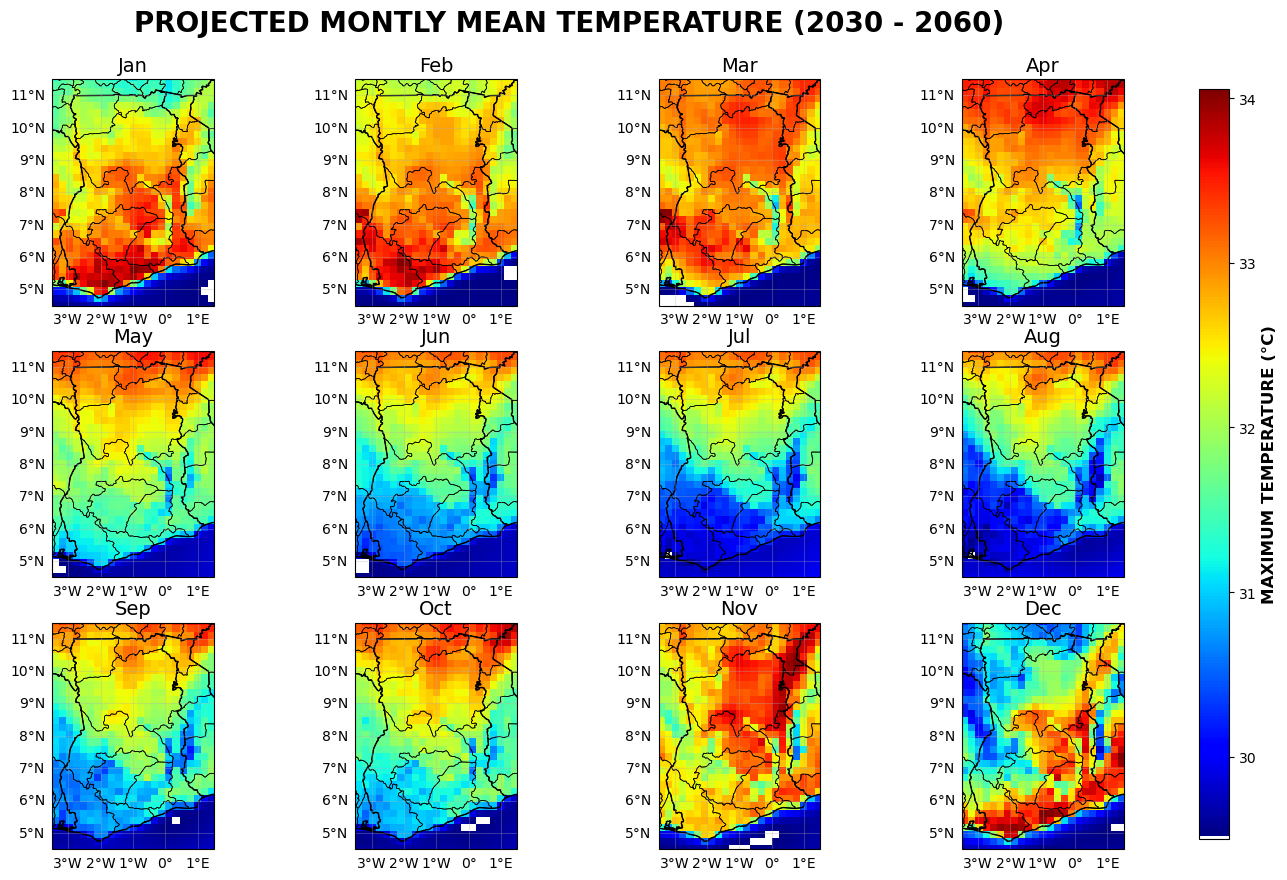

In [63]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors
import numpy as np

# Define a new colormap with white for the lowest value
cmap = plt.get_cmap('jet')
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plotting
fig, ax = plt.subplots(3, 4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in range(12):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=1)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].coastlines(resolution='10m')

    # Set extent (you can customize this based on Ghana or CORDEX region)
    lonW, lonE, latS, latN = -3.5, 1.5, 4.5, 11.5
    ax[i].set_extent((lonW, lonE, latS, latN), crs=ccrs.PlateCarree())

    # Gridlines
    gl = ax[i].gridlines(draw_labels=True, x_inline=False, y_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.right_labels = False
    gl.top_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Plot
    cs = ax[i].pcolormesh(lons, lats, monthly_wbt_climatology[i], cmap=new_cmap, shading='auto')
    ax[i].set_title(month_names[i], fontsize=14)

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.75])  # [left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("MAXIMUM TEMPERATURE (°C)", fontsize=12, fontweight='bold')

# Title
fig.suptitle("PROJECTED MONTLY MEAN TEMPERATURE (2030 - 2060)", fontsize=20, fontweight='bold', y=0.95)

# Save
fig.savefig('monthly_temp_climatology.png', bbox_inches='tight', dpi=500)
plt.show()


In [40]:
annual_wbt_climatology = wbt.sel(time=slice( '2025', '2034')).groupby("time.year").mean(dim="time")
lons = temp['rlon']  # or rh['lon']
lats = temp['rlat']


In [41]:
annual_wbt_climatology

<xarray.DataArray 'wet_bulb_temperature' (year: 25, rlat: 37, rlon: 23)>
dask.array<stack, shape=(25, 37, 23), dtype=float32, chunksize=(1, 37, 23), chunktype=numpy.ndarray>
Coordinates:
    lon      (rlat, rlon) float32 356.6 356.8 357.0 357.2 ... 0.99 1.21 1.43
    lat      (rlat, rlon) float32 4.51 4.51 4.51 4.51 ... 12.43 12.43 12.43
  * rlon     (rlon) float64 -3.41 -3.19 -2.97 -2.75 ... 0.77 0.99 1.21 1.43
  * rlat     (rlat) float64 4.51 4.73 4.95 5.17 5.39 ... 11.77 11.99 12.21 12.43
    height   float64 2.0
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2045 2046 2047 2048 2049
Attributes:
    units:        degC
    description:  Wet Bulb Temperature calculated using Roland Stull's empiri...

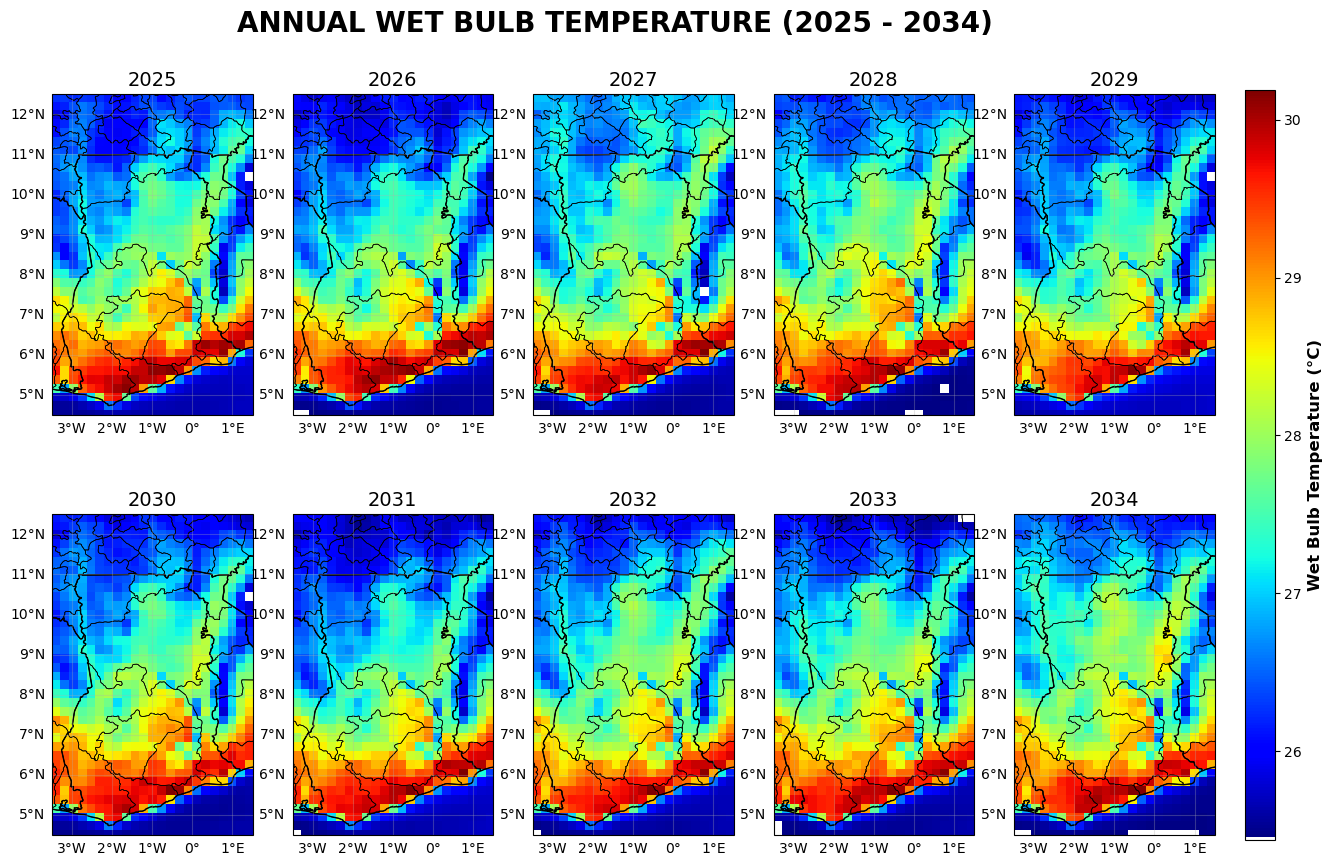

In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors
import numpy as np

# Define a new colormap with white for the lowest value
cmap = plt.get_cmap('jet')
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plotting
fig, ax = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

year_names = ['2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034']

for i in range(10):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=1)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].coastlines(resolution='10m')

    # Set extent (you can customize this based on Ghana or CORDEX region)
    lonW, lonE, latS, latN = -3.5, 1.5, 4.5, 12.5
    ax[i].set_extent((lonW, lonE, latS, latN), crs=ccrs.PlateCarree())

    # Gridlines
    gl = ax[i].gridlines(draw_labels=True, x_inline=False, y_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.right_labels = False
    gl.top_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Plot
    cs = ax[i].pcolormesh(lons, lats, annual_wbt_climatology[i], cmap=new_cmap, shading='auto')
    ax[i].set_title(year_names[i], fontsize=14)

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.75])  # [left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Wet Bulb Temperature (°C)", fontsize=12, fontweight='bold')

# Title
fig.suptitle("ANNUAL WET BULB TEMPERATURE (2025 - 2034)", fontsize=20, fontweight='bold', y=0.95)

# Save
#fig.savefig('monthly_wbt_climatology.png', bbox_inches='tight', dpi=500)
plt.show()


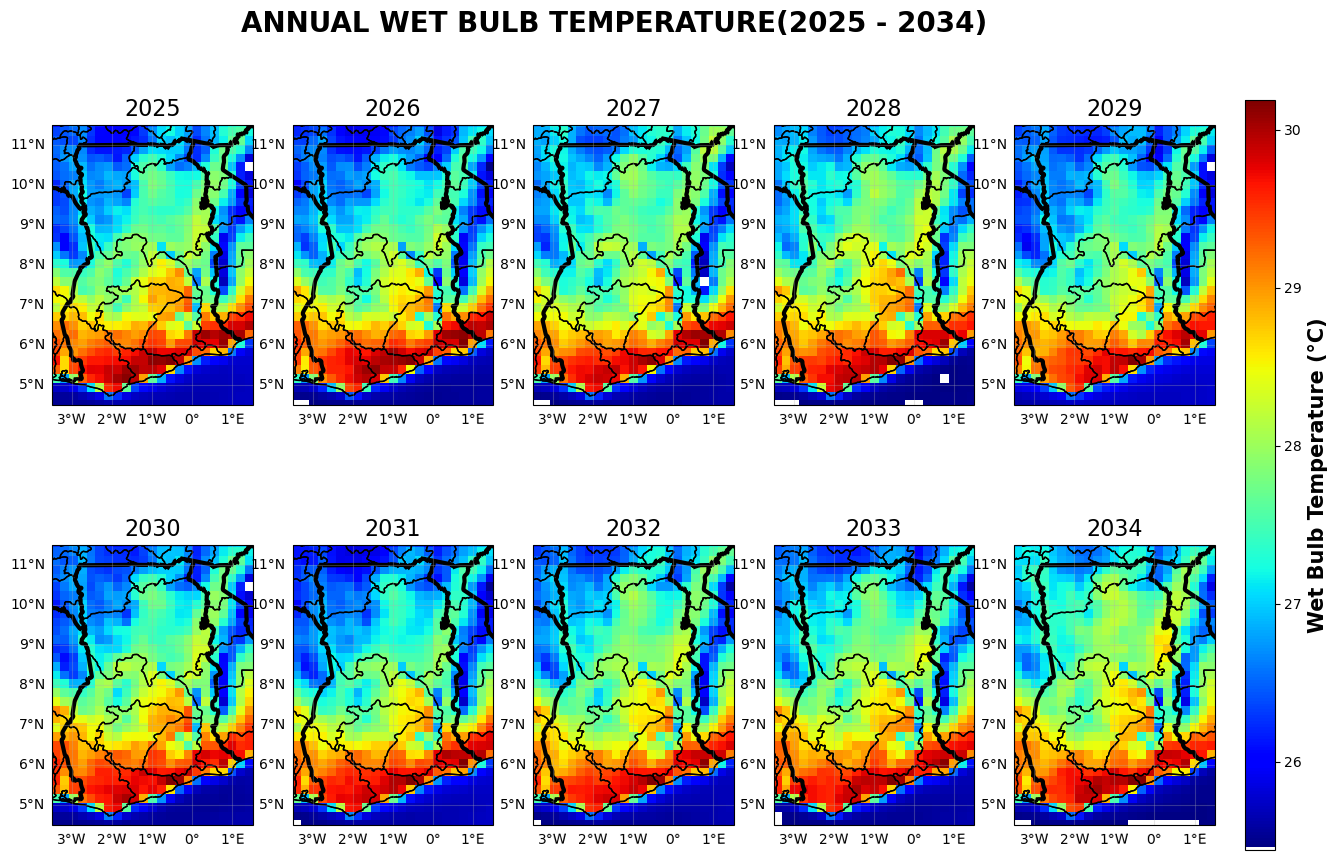

In [50]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

year_names = ['2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(year_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -3.5, 1.5, 4.5, 11.5
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(annual_wbt_climatology['rlon'],annual_wbt_climatology['rlat'],annual_wbt_climatology[i], cmap=new_cmap)
    ax[i].set_title(year_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Wet Bulb Temperature (°C)", fontsize=15, fontweight='bold')

fig.suptitle('ANNUAL WET BULB TEMPERATURE(2025 - 2034)', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('annual-wbt.png', bbox_inches='tight', dpi=500)
plt.show()